In [164]:
from google.colab import drive 
drive.mount('/content/drive')

# Tensorflow 2.x is used 
%tensorflow_version 2.x

#IMPORTS
import os
from google.colab import files
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image
import cv2 as cv
from random import shuffle
from skimage.color import rgb2gray

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten, Conv2D,MaxPooling2D
import keras.backend as K

# Training is done on a GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir = '/content/drive/MyDrive/Bismuth_Data_Processed/'

In [3]:
for file in os.scandir(data_dir):
  print(file.path)

/content/drive/MyDrive/Bismuth_Data_Processed/Bismuth Scan Notes COMPLETE - Useful scans.csv
/content/drive/MyDrive/Bismuth_Data_Processed/processed data scan100.txt
/content/drive/MyDrive/Bismuth_Data_Processed/Bismuth Scan Notes COMPLETE - Scans by fluence.csv
/content/drive/MyDrive/Bismuth_Data_Processed/Bismuth Scan Notes COMPLETE - Useful scans.tsv
/content/drive/MyDrive/Bismuth_Data_Processed/MONEYSHOT
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-25
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-21
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-17
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-16
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-12
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-18
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-19
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-22
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-24
/content/drive/MyDrive/Bismuth_Data_Processed/2021-02-09
/content/drive/MyD

In [90]:
def process_data(data_dir):
  data_dict = {}
  file_name_array = []
  for subdirectories, directories, files in os.walk(data_dir):
    for file_name in files:
      file_loc = subdirectories + os.path.sep + file_name
      
      if file_loc.endswith(".jpg"):      
        if 'off' in file_name.lower() or 'on' in file_name.lower():
          photo = Image.open(file_loc)

          file_loc_cropped = file_loc.split('Bismuth_Data_Processed/')[1].lower().strip().replace(' ','')
          #print(file_loc_cropped)
          #bw_photo_arr = rgb2gray(np.array(photo))
          photo_arr = np.array(photo)
          file_name_array.append(file_loc_cropped)
          data_dict[file_loc_cropped]=photo_arr
          #print(len(data_array))
  #shuffle(data_array)
  print("Done! Added {} images".format(len(data_dict.values())))
  return file_name_array, data_dict


In [94]:
file_name_array, data_dict = process_data(data_dir)





Done! Added 7614 images


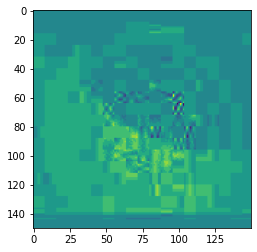

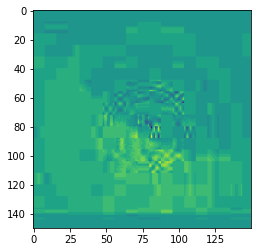

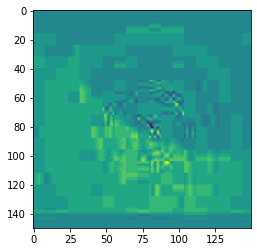

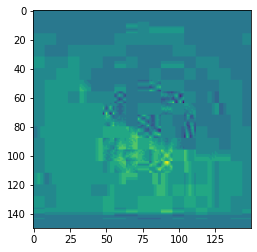

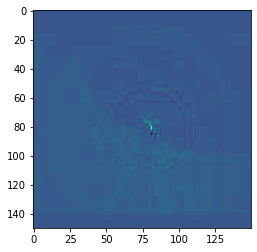

Done! Have 1912 usable images


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [258]:
#Commented bc I've already saved array to npy file
"""
file_name_array.sort()

subtracted_photos = []
subtracted_photos_gray = []
for index in range(0,len(file_name_array)-1):

  off_file_name = file_name_array[index]
  off_file_name_split = off_file_name.split('scan',3)[3]
  off_file_num = int(off_file_name_split.split("_",2)[0])*1000+int(off_file_name.split("_",2)[1])

  on_file_name = file_name_array[index+1]
  on_file_name_split = on_file_name.split('scan',3)[3]
  on_file_num = int(on_file_name_split.split("_",2)[0])*1000+int(on_file_name.split("_",2)[1])
  
  if (on_file_num == off_file_num + 1) and ('on' in on_file_name) and ('off' in off_file_name): 
    
    #print(off_file_name)
    #print(on_file_name)
    off_photo = np.asarray(data_dict[off_file_name])
    on_photo = np.asarray(data_dict[on_file_name])
    
    off_photo_gray = rgb2gray(off_photo)
    on_photo_gray = rgb2gray(on_photo)
    sub_photo = (on_photo-off_photo)/255
    sub_photo_gray = (on_photo_gray-off_photo_gray)/255
    #print(np.array(sub_photo).shape)
    if not np.array_equal(sub_photo,np.zeros((150,150,3))):
      subtracted_photos.append([sub_photo,off_file_name])
      subtracted_photos_gray.append([sub_photo_gray,off_file_name])
    if index < 10:
      plt.imshow(sub_photo_gray)
      plt.show()
    
print("Done! Have {} usable images".format(len(subtracted_photos)))
np.save('/content/drive/MyDrive/Bismuth_Data_Processed/Subtracted_Images_RGB.npy',subtracted_photos)
np.save('/content/drive/MyDrive/Bismuth_Data_Processed/Subtracted_Images_GRAY.npy',subtracted_photos_gray)
"""

In [259]:
subtracted_photos = np.array(np.load('/content/drive/MyDrive/Bismuth_Data_Processed/Subtracted_Images_Strict.npy',allow_pickle=True))

2021-02-22/scans/scan3/scan3_000023_gl-1_000500_fs_off_nan_md_.jpg


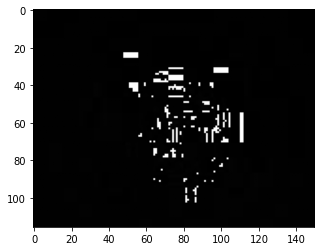

In [267]:
np.random.shuffle(subtracted_photos)
plt.imshow(subtracted_photos[0][0][17:133,:])
print(subtracted_photos[0][1])
plt.show()

In [171]:
org_list = [[10, 20], [30, 40], [50, 60]]

# Converting  the list into a numpy array
seq = np.array(org_list)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
np.random.shuffle(seq)

print(seq)

Original order of the sequence is : [[10 20]
 [30 40]
 [50 60]]
[[30 40]
 [50 60]
 [10 20]]


In [6]:
photos,file_names = zip(*data_array)


In [7]:
i = 0
labels = []
usable_photos = []

for file_num in range(0,len(file_names)):
  processed_file_name = file_names[file_num].lower().strip().replace(' ','').split('bismuth_data_processed')[1]
  """
  print(processed_file_name)
  scan_num = processed_file_name.split('scan')[3].split('_gl')[0]
  time = processed_file_name.split('scan',-1)[3].split('_gl')[1].split('_fs_')[0]
  power = processed_file_name.split('scan')[3].split('_gl')[1].split('_fs_')[1].split('_')[0]
  print(scan_num)
  print(time)
  print(power)
  """
  if 'on' in processed_file_name:
    labels.append([0,1])
    usable_photos.append(photos[file_num])
  elif 'off' in processed_file_name:
    labels.append([1,0])
    usable_photos.append(photos[file_num])
#print(labels[0].shape)
labels_array = np.array(labels).reshape(-1,2)
print(len(labels_array))

photos_array = np.array(usable_photos).reshape(-1,150,150,3)
print(photos_array.shape)

7614
(7614, 150, 150, 3)


In [54]:
# Defines the neural network that will be trained on the player's data 
# Returns uncompiled network
def build_resnet_model(lr): #reaches 72% accuracy on on/off classification
  """
  Transfer learning: a ResNet50 trained on imagenet is used with its last 4 layers removed.
  Trainable fully connected layers are added on top of the imagenet conv layers
  Dropout was initially used but was later removed for performance reasons
  https://towardsdatascience.com/pitfalls-with-dropout-and-batchnorm-in-regression-problems-39e02ce08e4d
  """
  resnet = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  for layer in resnet.layers[:-4]:
    layer.trainable = False

  # Prints network details for debugging
  """
  for layer in resnet.layers:
    print(layer, layer.trainable)
  """

  model = Sequential()
  model.add(resnet)
  # model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500, activation='tanh'))
  # model.add(Dropout(0.5))
  model.add(Dense(200, activation='tanh'))
  # model.add(Dropout(0.5))
  model.add(Dense(50, activation='tanh'))
  # model.add(Dropout(0.5))
  model.add(Dense(10, activation='tanh'))
  # model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = lr), metrics=['accuracy'])
  return model

def build_cnn_model(): #reaches 75% accuracy on on/off classification
  cnn_model = keras.Sequential([
      keras.layers.Conv2D(filters=36,input_shape=(150,150,3),kernel_size=(5,5),activation=tf.nn.relu),           
      keras.layers.MaxPool2D(pool_size=(2, 2)),
      keras.layers.Conv2D(filters=72,kernel_size=(5,5),activation=tf.nn.relu), 
      keras.layers.MaxPool2D(pool_size=(2, 2)),
      keras.layers.Conv2D(filters=144,kernel_size=(5,5),activation=tf.nn.relu), 
      keras.layers.MaxPool2D(pool_size=(2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dense(250, activation=tf.nn.relu),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])
  return cnn_model

----- --------STARTING EPOCH 0-------------
229/229 [==============================] - 5s 21ms/step - loss: 0.8538 - accuracy: 0.5673 - val_loss: 0.5849 - val_accuracy: 0.6168
----- --------STARTING EPOCH 1-------------
229/229 [==============================] - 5s 20ms/step - loss: 0.5644 - accuracy: 0.6459 - val_loss: 0.5615 - val_accuracy: 0.6102
----- --------STARTING EPOCH 2-------------
229/229 [==============================] - 5s 20ms/step - loss: 0.5256 - accuracy: 0.6778 - val_loss: 0.6175 - val_accuracy: 0.6496
----- --------STARTING EPOCH 3-------------
229/229 [==============================] - 5s 20ms/step - loss: 0.4798 - accuracy: 0.6960 - val_loss: 0.5002 - val_accuracy: 0.6969
----- --------STARTING EPOCH 4-------------
229/229 [==============================] - 5s 20ms/step - loss: 0.4517 - accuracy: 0.7103 - val_loss: 0.5993 - val_accuracy: 0.7021
----- --------STARTING EPOCH 5-------------
229/229 [==============================] - 5s 22ms/step - loss: 0.4391 - acc

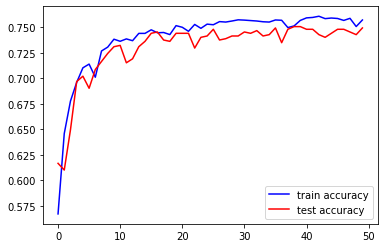

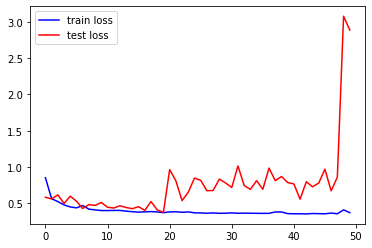

In [55]:

#model = build_resnet_model(0.0008)
model = build_cnn_model()
accuracy_values = []
validation_accuracy_values= []
loss_values = []
validation_loss_values = []

EPOCHS = 50

#Training Neural Net
for i in range(0,EPOCHS):
  print('----- --------STARTING EPOCH {}-------------'.format(i))

  history = model.fit(photos_array,labels_array,batch_size=30,epochs=1,validation_split=0.1)

  #Storing accuracy and loss values
  accuracy_values.append(history.history['accuracy'][0])
  validation_accuracy_values.append(history.history['val_accuracy'][0])
  loss_values.append(history.history['loss'][0])
  validation_loss_values.append(history.history['val_loss'][0])

#Plotting NN performance
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)

ax1.plot(accuracy_values, "-b",label = "train accuracy")
ax1.plot(validation_accuracy_values, "-r",label = "test accuracy")
ax1.legend()
ax2 = f2.add_subplot(111)
ax2.plot(loss_values, "-b",label = "train loss")
ax2.plot(validation_loss_values, "-r",label = "test loss")
ax2.legend()
plt.show()
